## Cluster Analysis, ANN and Text Mining Project 
Mining Manatees

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Part 1 – CLUSTER ANALYSIS. 
I ran a K means algorithm with k values of 2,3,4,5,6 on the imdb movie dataset. I wanted to find clusters on a number of predictors, such as `imdb number votes` , `genre` , `critics_score` and so forth. I used hot encoding to convert the text values of strings to numerical values. From the SSE vs clusters graph, there is strong evidence that k =6, or six clusters have a low mean of squared distances.

['Unnamed: 0', 'title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url']


Text(0, 0.5, 'SSE')

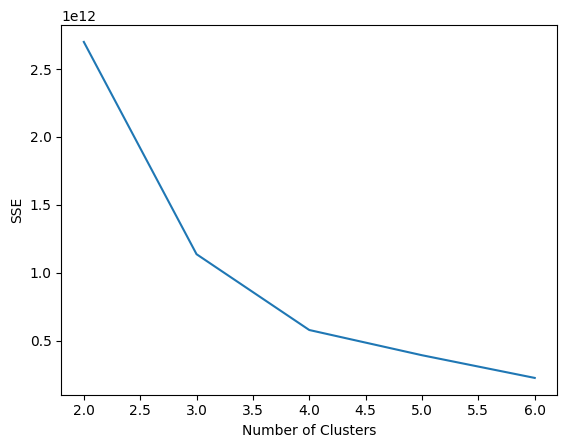

In [3]:
#read data
data = pd.read_csv("/Users/xuanxuanmiao/csc177/imdb_dataset.csv")

#preview data
print(list(data.columns))

#i only want to focus on these columns
columnsToKeep = ['title_type', 'genre','runtime','imdb_rating','imdb_num_votes','imdb_num_votes','critics_score','audience_score','best_pic_win','best_actor_win','best_actress_win', 'actor1', 'actor2']

cleanData = data.filter(columnsToKeep)
cleanData = cleanData.dropna()


#encode these columns since they are text columns
cleanData['title_type'] = pd.Categorical(cleanData['title_type']).codes
cleanData['genre'] = pd.Categorical(cleanData['genre']).codes
cleanData['best_pic_win'] = pd.Categorical(cleanData['best_pic_win']).codes
cleanData['best_actor_win'] = pd.Categorical(cleanData['best_actor_win']).codes
cleanData['best_actress_win'] = pd.Categorical(cleanData['best_actress_win']).codes
cleanData['actor1'] = pd.Categorical(cleanData['actor1']).codes
cleanData['actor2'] = pd.Categorical(cleanData['actor2']).codes
cleanData

#number of clusters, our k value
numClusters = [2,3,4,5,6]

#a list of our sum of squared distances to their closest cluster center
SSE = []
for k in numClusters:
    k_means = KMeans(n_clusters=k, random_state = 10)
    k_means.fit(cleanData)
    SSE.append(k_means.inertia_)
    
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

cluster : Hierarchical clustering with single average linkage , visulalize of the db . using scikit-learn. 

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# load db 
data = pd.read_csv("/Users/xuanxuanmiao/csc177/imdb_dataset.csv")

# Select columns of interest
columnsToKeep = ['title_type', 'genre', 'runtime', 'imdb_rating', 'imdb_num_votes',
                 'critics_score', 'audience_score', 'best_pic_win', 'best_actor_win',
                 'best_actress_win', 'actor1', 'actor2']

cleanData = data[columnsToKeep].dropna()

# Encode categorical columns
cleanData['title_type'] = pd.Categorical(cleanData['title_type']).codes
cleanData['genre'] = pd.Categorical(cleanData['genre']).codes
cleanData['best_pic_win'] = pd.Categorical(cleanData['best_pic_win']).codes
cleanData['best_actor_win'] = pd.Categorical(cleanData['best_actor_win']).codes
cleanData['best_actress_win'] = pd.Categorical(cleanData['best_actress_win']).codes
cleanData['actor1'] = pd.Categorical(cleanData['actor1']).codes
cleanData['actor2'] = pd.Categorical(cleanData['actor2']).codes

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleanData)

In [7]:
# Number of clusters
num_clusters = [2, 3, 4, 5, 6]

# Hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average']
results = {}

for linkage in linkage_methods:
    sse = []
    for k in num_clusters:
        # Perform hierarchical clustering
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        cluster_labels = model.fit_predict(scaled_data)
        cluster_centers = np.zeros((k, scaled_data.shape[1]))
        for i in range(k):
            cluster_centers[i] = np.mean(scaled_data[cluster_labels == i], axis=0)
        # Calculate SSE (sum of squared distances)
        sse.append(np.sum((scaled_data - cluster_centers[cluster_labels]) ** 2))
    results[linkage] = sse


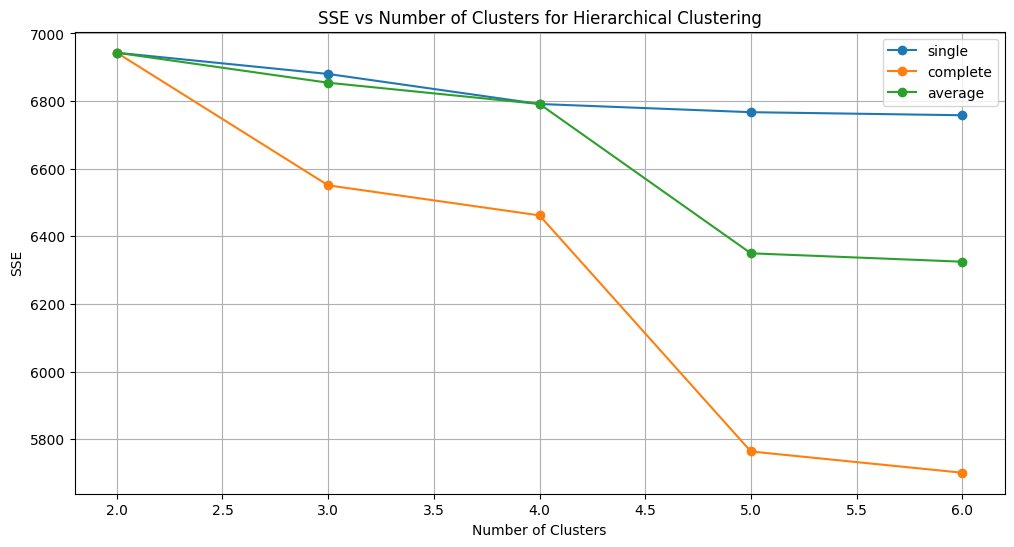

In [8]:
# Plot SSE vs Number of clusters for each linkage method
plt.figure(figsize=(12, 6))
for linkage, sse in results.items():
    plt.plot(num_clusters, sse, marker='o', label=linkage)
plt.title('SSE vs Number of Clusters for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.grid(True)
plt.show()


Part2: Text Mining

In [20]:
data['title'] = data['title'].str.lower().str.replace(r'[^\w\s]+', '', regex=True)

# count vectors
count_vect = CountVectorizer(stop_words='english')
count_matrix = count_vect.fit_transform(data['title'])
count_data = pd.DataFrame(count_matrix.toarray(), columns=count_vect.get_feature_names_out())

# tf-idf vector
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vect.fit_transform(data['title'])
tfidf_normalized = normalize(tfidf_matrix, norm='l1', axis=1)
tfidf_data = pd.DataFrame(tfidf_normalized.toarray(), columns=tfidf_vect.get_feature_names_out())

print("Count Vector DataFrame (First 5 Rows):")
print(count_data.head())

print("\nTF-IDF Vector DataFrame (First 5 Rows):")
print(tfidf_data.head())


Count Vector DataFrame (First 5 Rows):
   1000  101  11  110901  12  18  1941  200  21  25th  ...  year  yes  york  \
0     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
1     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
2     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
3     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
4     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   

   young  youre  zero  ziggy  zombi  zonethe  zorn  
0      0      0     0      0      0        0     0  
1      0      0     0      0      0        0     0  
2      0      0     0      0      0        0     0  
3      0      0     0      0      0        0     0  
4      0      0     0      0      0        0     0  

[5 rows x 1010 columns]

TF-IDF Vector DataFrame (First 5 Rows):
   1000  101   11  110901   12   18  1941  200   21  25th  ...  year  yes  \
0   0.0  0.0  0.0     0.0

Usage:


Part3: ANN (Artificial Neural Network)

Part4: Report

Part5: Data Preprocessing for ANN (BONUS)